# Introduction  test
Baseball is a sport that has been revolutionized by analytics. Introduced to pop culture by the film Moneyball, which depicted a small-market team (the Oakland Athletics) achieve success by using statistics in a different way than anyone else, analytics in baseball have advanced significantly since the Athletics in 2002. Not only are there different statistics to represent how good a player's results on the field are, new tecnhology and statistics have been developed to further evaluate players based on their expected results. Here's an example: someone could hit the ball really hard directly at a fielder, and another player could hit the ball not as hard, but right between fielders, and they get a hit. You would prefer a hitter hit the ball hard rather than hitting it not as hard, but if you only look at results, the second player is better. Statistics like exit velocity (how hard the ball is hit) and launch angle (the angle at which the ball comes off the bat) measure inputs, rather than outcomes. These new statistics are called statcast statistics, named after the technological system that makes their collection possible. This is a major shift in what the "best way to play" is: now that we can determine the best inputs, we no longer have to guess the best inputs to get the best outputs. Also, we can determine what the easiest way to get the best outputs are: you win games by scoring runs, and the easiest way to score runs is to hit home runs. Therefore, players are trying to hit as many home runs as possible.  
Our goal with this project was to determine "what combination of statcast statistics best predicts the performance of a batter who qualified for the batting title in the years 2015-2019 in a single season". We had two more specific goals within this, namely finding the combination of statcast statistics that best predicts a batter who qualified for the batting title in 2015-2019's offensive performance in terms of OPS+, wrC+, and xWOBA, and finding what combination of statcast statistics best predicts a batter who qualified for the batting title in 2015-2019's UBR.  
Some explanation: statcast was first implemented in 2015, so despite baseball having records back to the late 1800s, we only have statcast data since 2015. Secondly, "who qualified for the batting title" means that we excluded batters with a small number of at-bats during each season. Finally, OPS+, wRC+, and xWOBA are three different statistics used to measure a player's offensive performance.  
We went about this by testing the significance of the relationship between the variables of launch angle average (the average angle at which the ball left a player's bat over a year) and the three offensive performance statistics, as well as creating predicting models for statistics like UBR (a baserunning metric), and our offensive predictors.  
We found significant relation between launch angle and our offensive metrics, and created multiple models that improved over time that eventually were able to predict offensive performance from a small number of significant predictors.
The results of our analysis can be useful in a number of ways: it could be used to predict player performance in future years, and although our research may not be as useful for professional teams with their own analytics departments, it could definitely help someone's chances in a fantasy baseball league.  
Despite finding significant results, some weaknesses in our techniques or in the variables that we used inspired possible further research, such as in the case where we could develop improved regressions by using different launch angle metrics and different offensive predictors.

# Preregistered Analysis: More In-Depth Analysis of Launch Angle
In our exploratory data analysis, we noticed that launch angle average did not have a high correlation coefficient with offensive value stats such as OPS+ and wRC+. We think this is because there is an ideal numerical range of average launch angles for peak offensive performance.
Over the past few years, there has been a major emphasis on changing the type of swing a batter would use to optimize their success, away from the traditional flat or even downwards-angled swing used to generate line drives, balls hit with a launch angle between 10 and 25 degrees, to a swing emphasizing flyballs, balls hit with a launch angle between 25 and 50 degrees (https://www.si.com/mlb/2018/03/21/evolution-swing-home-run-opening-day).  
To test our hypothesis that launch angle affects offensive performance, we ran linear regressions on average launch angle and each of our three major offensive value stats. The goal was to see if there was a regression score that would show some connection between increasing launch angle and offensive performance. We see that there is little to no relation between ranges of average launch angle and performance.


In [19]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [20]:
data_2019 = pd.read_csv('2019_statcast_data_final.csv')
data_2018 = pd.read_csv('2018_statcast_data_final.csv')
data_2017 = pd.read_csv('2017_statcast_data_final.csv')
data_2016 = pd.read_csv('2016_statcast_data_final.csv')
data_2015 = pd.read_csv('2015_statcast_data_final.csv')
data_2018 = data_2018.head(139)

In [21]:
def launch_angle_avg_quartile(n):
    if(n >= q0 and n <= q1):
        return 1
    if(n >= q1 and n <=q2):
        return 2
    if(n >= q2 and n <= q3):
        return 3
    if(n >= q3 and n <= q4):
        return 4

# 2015-2019 (All years combined) Analysis

To avoid redundancy (because each individual year's data looks pretty similar), we are only showing here some analysis on all of the data combined (2015-2019), and will go further in depth in the significance section.  
Shown below are a histogram of average launch angles, a boxplot of average launch angles, and below that scatterplots with regression lines, regression slope values, and R-squared values for each of our offensive value statistics (OPS+, wRC+, and xWOBA) for both average launch angle and average launch angle quartile. Using average launch quartile allows us to split the values into ranges, so that we may see if specific ranges of launch angles are more succesful.

In [22]:
all_dfs = [data_2015,data_2016,data_2017,data_2018,data_2019]
all_data = pd.concat(all_dfs).reset_index(drop=True)

q0 = all_data['launch_angle_avg'].quantile(0)
q1 = all_data['launch_angle_avg'].quantile(0.25)
q2 = all_data['launch_angle_avg'].quantile(0.5)
q3 = all_data['launch_angle_avg'].quantile(0.75)
q4 = all_data['launch_angle_avg'].quantile(1)

dummy_all = map(launch_angle_avg_quartile, all_data['launch_angle_avg'])
all_data['launch_quartile'] = list(dummy_all)

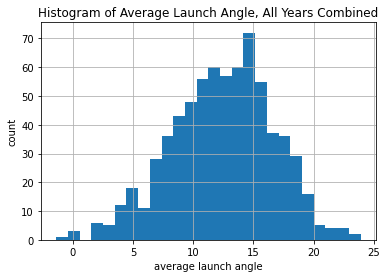

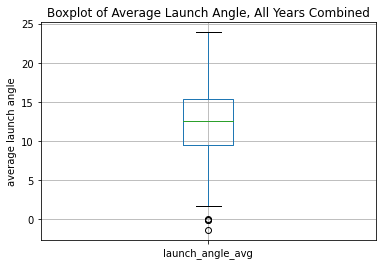

In [44]:
all_data.hist(column='launch_angle_avg', bins = math.ceil(all_data['launch_angle_avg'].max() - all_data['launch_angle_avg'].min()))
plt.xlabel('average launch angle')
plt.ylabel('count')
plt.title('Histogram of Average Launch Angle, All Years Combined')
plt.show()

all_data.boxplot(column='launch_angle_avg')
plt.title('Boxplot of Average Launch Angle, All Years Combined')
plt.ylabel('average launch angle')
plt.show()

Our distribution looks fairly normal, so it is interesting to observe that about half of all players have an average launch angle between 10 and 15 degrees, when we consider some of our upcoming findings.

wRC+ model
Predictor: launch angle avg quartile
Regression Slope: 4.3948792355728
R-squared: 0.04737495317219864



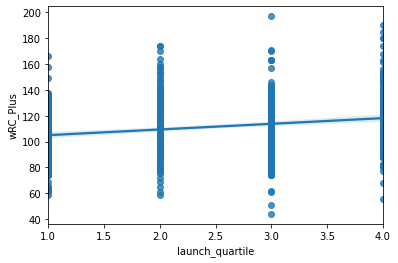

wRC+ model
Predictor: launch angle average
Regression Slope: 1.199656093370689
R-squared: 0.05007331157104544



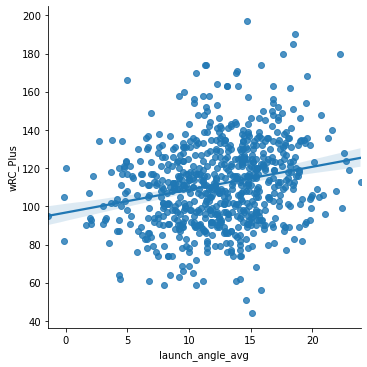

OPS+ model
Predictor: launch angle average quartile
Regression Slope: 4.580078078029932
R-squared: 0.0528257103534443



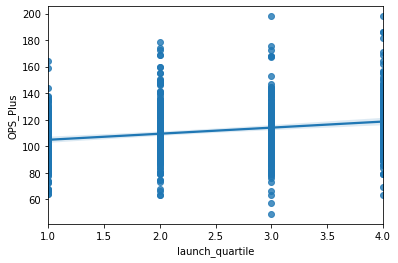

OPS+ model
Predictor: launch angle average
Regression Slope: 1.2448062793361567
R-squared: 0.055352980046875055



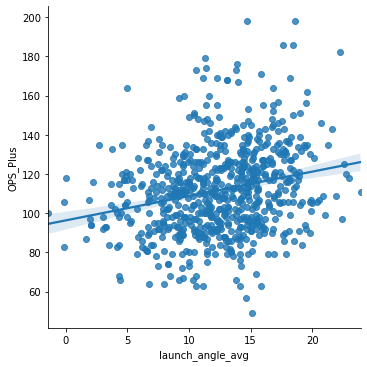

xWOBA model
Predictor: launch angle average quartile
Regression Slope: 0.006956956079104106
R-squared: 0.04982629283791551



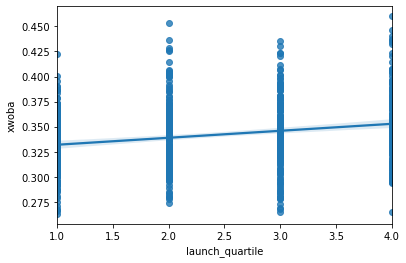

xWOBA model
Predictor: launch angle
Regression Slope: 0.001939215916380131
R-squared: 0.054917438292421905



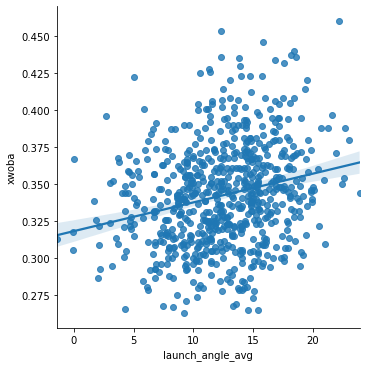

In [28]:
wRC_model_all = LinearRegression().fit(all_data[['launch_quartile']], all_data[['wRC_Plus']])
print('wRC+ model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_all.coef_[0][0], wRC_model_all.score(all_data[['launch_quartile']], all_data[['wRC_Plus']])))

sns.regplot(x="launch_quartile", y="wRC_Plus", data=all_data)
plt.show()

wRC_model_all_2 = LinearRegression().fit(all_data[['launch_angle_avg']], all_data[['wRC_Plus']])
print('wRC+ model\nPredictor: launch angle average\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_all_2.coef_[0][0], wRC_model_all_2.score(all_data[['launch_angle_avg']], all_data[['wRC_Plus']])))

sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=all_data)
plt.show()

OPS_model_all = LinearRegression().fit(all_data[['launch_quartile']], all_data[['OPS_Plus']])
print('OPS+ model\nPredictor: launch angle average quartile\nRegression Slope: {}\nR-squared: {}\n'.format(OPS_model_all.coef_[0][0], OPS_model_all.score(all_data[['launch_quartile']], all_data[['OPS_Plus']])))

sns.regplot(x="launch_quartile", y="OPS_Plus", data=all_data)
plt.show()

OPS_model_all_2 = LinearRegression().fit(all_data[['launch_angle_avg']], all_data[['OPS_Plus']])
print('OPS+ model\nPredictor: launch angle average\nRegression Slope: {}\nR-squared: {}\n'.format(OPS_model_all_2.coef_[0][0], OPS_model_all_2.score(all_data[['launch_angle_avg']], all_data[['OPS_Plus']])))

sns.lmplot(x="launch_angle_avg", y="OPS_Plus", data=all_data)
plt.show()

xWOBA_model_all = LinearRegression().fit(all_data[['launch_quartile']], all_data[['xwoba']])
print('xWOBA model\nPredictor: launch angle average quartile\nRegression Slope: {}\nR-squared: {}\n'.format(xWOBA_model_all.coef_[0][0], xWOBA_model_all.score(all_data[['launch_quartile']], all_data[['xwoba']])))

sns.regplot(x="launch_quartile", y="xwoba", data=all_data)
plt.show()

xWOBA_model_all_2 = LinearRegression().fit(all_data[['launch_angle_avg']], all_data[['xwoba']])
print('xWOBA model\nPredictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(xWOBA_model_all_2.coef_[0][0], xWOBA_model_all_2.score(all_data[['launch_angle_avg']], all_data[['xwoba']])))

sns.lmplot(x="launch_angle_avg", y="xwoba", data=all_data)
plt.show()

Despite a lot of noise, these slopes do not seem to be random. Just from this, it might be reasonable that an increase in launch angle leads to an increase in offensive performance.

# Significance

To test the significance of the results found from this analysis, I will show the difference in R-Squared value and slope between the regressions with real values and regressions using fake values taken from normal distributions with the same mean, standard deviation, and sample size. I will then analyze the slope of the real regressions by showing possible slopes from randomizing the order of the y-values but keeping the x-values constant, and then determining how unlikely it was to get the slopes that we did.  
If our real slopes are steeper than enough of the randomly generated slopes, we will conclude that these slopes are not random, and there is some relationship between our independent and dependent variables, average launch angle and offensive performance.

In [45]:
def fake_regressions(n_samples, x_sample_mean, x_sample_sd, y_sample_mean, y_sample_sd, i, stat):
    regression_slopes = np.zeros(1000)
    regression_scores = np.zeros(1000)
    year = ""
    if(i == 5):
        year = 'All Years'
    else:
        year = str(i + 2015)
        
    for trial in range(1000):
        data = pd.DataFrame({'x': np.random.normal(x_sample_mean, x_sample_sd, size = n_samples),'y': np.random.normal(y_sample_mean, y_sample_sd, size = n_samples)})
        model = LinearRegression().fit(data[['x']], data[['y']])
        regression_slopes[trial] = model.coef_[0]
        regression_scores[trial] = model.score(data[['x']], data[['y']])
    
    print(year, stat, 'Large sample of random regressions\nRegression Slope: ', regression_slopes.mean())
    print('R-squared: ', regression_scores.mean(),'\n\n')
    
def permute(y):
    # shuffle modifies the array itself, so first make a copy
    permuted_y = y.copy()
    # now randomize it
    np.random.shuffle(permuted_y)
    return permuted_y

def plot_model_line(model, x_extent, is_resampled=True):
    if is_resampled:
        color="0.8"
    else:
        color="blue"
    plt.plot(x_extent, x_extent * model.coef_[0] + model.intercept_, color=color)
    
def plot_fake_vs_real_and_significance(real_x_Series, real_y_Series, real_x_Dataframe, real_model, x_label, y_label, x_extent):
    plt.scatter(real_x_Series, real_y_Series)
    
    steeper_slopes = 0
    n_permutations = 10000
    permuted_slopes = np.zeros(n_permutations)

    for i in range(n_permutations):
        fake_y = permute(real_y_Series)
        fake_model = LinearRegression().fit(real_x_Dataframe, fake_y)
        plot_model_line(fake_model, x_extent)
        
        permuted_slopes[i] = fake_model.coef_[0]
    
        if np.abs(fake_model.coef_[0]) > np.abs(real_model.coef_[0]):
            steeper_slopes += 1
        
    plot_model_line(real_model, x_extent, is_resampled=False)
    print('Percent of permutated regression slopes steeper than the real regression slope: ',(steeper_slopes / n_permutations)*100,'%')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [46]:
dataframes = [data_2015,data_2016,data_2017,data_2018,data_2019,all_data]
wRC_models = [wRC_model_2015,wRC_model_2016,wRC_model_2017,wRC_model_2018,wRC_model_2019,wRC_model_all]
OPS_models = [OPS_model_2015,OPS_model_2016,OPS_model_2017,OPS_model_2018,OPS_model_2019,OPS_model_all]
xWOBA_models = [xWOBA_model_2015,xWOBA_model_2016,xWOBA_model_2017,xWOBA_model_2018,xWOBA_model_2019,xWOBA_model_all]
wRC_models_2 = [wRC_model_2015_2,wRC_model_2016_2,wRC_model_2017_2,wRC_model_2018_2,wRC_model_2019_2,wRC_model_all_2]
OPS_models_2 = [OPS_model_2015_2,OPS_model_2016_2,OPS_model_2017_2,OPS_model_2018_2,OPS_model_2019_2,OPS_model_all_2]
xWOBA_models_2 = [xWOBA_model_2015_2,xWOBA_model_2016_2,xWOBA_model_2017_2,xWOBA_model_2018_2,xWOBA_model_2019_2,xWOBA_model_all_2]
x_rows = ['launch_quartile','launch_angle_avg']
y_columns = ['wRC_Plus','OPS_Plus','xwoba']
#to get the x-series, do dataframes[i]['launch_angle_avg']
#to get the y-series, do dataframes[i]['launch_angle_avg']

In [47]:
for i in range(5):
    print(i + 2015,'wRC+ model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_models[i].coef_[0][0], wRC_models[i].score(dataframes[i][[x_rows[0]]], dataframes[i][['wRC_Plus']])))
    fake_regressions(len(dataframes[i][x_rows[0]]), dataframes[i][x_rows[0]].mean(), dataframes[i][x_rows[0]].std(), dataframes[i]['wRC_Plus'].mean(), dataframes[i]['wRC_Plus'].std(), i, "wRC+")
    
    print(i + 2015,'wRC+ model\nPredictor: launch angle avg\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_models_2[i].coef_[0][0], wRC_models_2[i].score(dataframes[i][[x_rows[1]]], dataframes[i][['wRC_Plus']])))
    fake_regressions(len(dataframes[i][x_rows[1]]), dataframes[i][x_rows[1]].mean(), dataframes[i][x_rows[1]].std(), dataframes[i]['wRC_Plus'].mean(), dataframes[i]['wRC_Plus'].std(), i, "wRC+")

    
    print(i + 2015,'OPS+ model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(OPS_models[i].coef_[0][0], OPS_models[i].score(dataframes[i][[x_rows[0]]], dataframes[i][['OPS_Plus']])))
    fake_regressions(len(dataframes[i][x_rows[0]]), dataframes[i][x_rows[0]].mean(), dataframes[i][x_rows[0]].std(), dataframes[i]['OPS_Plus'].mean(), dataframes[i]['OPS_Plus'].std(), i, "OPS+")
    
    print(i + 2015,'OPS+ model\nPredictor: launch angle avg\nRegression Slope: {}\nR-squared: {}\n'.format(OPS_models_2[i].coef_[0][0], OPS_models_2[i].score(dataframes[i][[x_rows[1]]], dataframes[i][['OPS_Plus']])))
    fake_regressions(len(dataframes[i][x_rows[1]]), dataframes[i][x_rows[1]].mean(), dataframes[i][x_rows[1]].std(), dataframes[i]['OPS_Plus'].mean(), dataframes[i]['OPS_Plus'].std(), i, "OPS+")

    
    print(i + 2015,'xWOBA model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(xWOBA_models[i].coef_[0][0], xWOBA_models[i].score(dataframes[i][[x_rows[0]]], dataframes[i][['xwoba']])))
    fake_regressions(len(dataframes[i][x_rows[0]]), dataframes[i][x_rows[0]].mean(), dataframes[i][x_rows[0]].std(), dataframes[i]['xwoba'].mean(), dataframes[i]['xwoba'].std(), i, "xWOBA")
    
    print(i + 2015,'xWOBA model\nPredictor: launch angle avg\nRegression Slope: {}\nR-squared: {}\n'.format(xWOBA_models_2[i].coef_[0][0], xWOBA_models_2[i].score(dataframes[i][[x_rows[1]]], dataframes[i][['xwoba']])))
    fake_regressions(len(dataframes[i][x_rows[1]]), dataframes[i][x_rows[1]].mean(), dataframes[i][x_rows[1]].std(), dataframes[i]['xwoba'].mean(), dataframes[i]['xwoba'].std(), i, "xWOBA")
    

print('All years wRC+ model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_models[5].coef_[0][0], wRC_models[5].score(dataframes[5][[x_rows[0]]], dataframes[5][['wRC_Plus']])))
fake_regressions(len(dataframes[5][x_rows[0]]), dataframes[5][x_rows[0]].mean(), dataframes[5][x_rows[0]].std(), dataframes[5]['wRC_Plus'].mean(), dataframes[5]['wRC_Plus'].std(), 5, "wRC+")
    
print('All years wRC+ model\nPredictor: launch angle avg\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_models_2[5].coef_[0][0], wRC_models_2[5].score(dataframes[5][[x_rows[1]]], dataframes[5][['wRC_Plus']])))
fake_regressions(len(dataframes[5][x_rows[1]]), dataframes[5][x_rows[1]].mean(), dataframes[5][x_rows[1]].std(), dataframes[5]['wRC_Plus'].mean(), dataframes[5]['wRC_Plus'].std(), 5, "wRC+")

print('All years OPS+ model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(OPS_models[5].coef_[0][0], OPS_models[5].score(dataframes[5][[x_rows[0]]], dataframes[5][['OPS_Plus']])))
fake_regressions(len(dataframes[5][x_rows[0]]), dataframes[5][x_rows[0]].mean(), dataframes[5][x_rows[0]].std(), dataframes[5]['OPS_Plus'].mean(), dataframes[5]['OPS_Plus'].std(), 5, "OPS+")
    
print('All years OPS+ model\nPredictor: launch angle avg\nRegression Slope: {}\nR-squared: {}\n'.format(OPS_models_2[5].coef_[0][0], OPS_models_2[5].score(dataframes[5][[x_rows[1]]], dataframes[5][['OPS_Plus']])))
fake_regressions(len(dataframes[5][x_rows[1]]), dataframes[5][x_rows[1]].mean(), dataframes[5][x_rows[1]].std(), dataframes[5]['OPS_Plus'].mean(), dataframes[5]['OPS_Plus'].std(), 5, "OPS+")

print('All years xWOBA model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(xWOBA_models[5].coef_[0][0], xWOBA_models[5].score(dataframes[5][[x_rows[0]]], dataframes[5][['xwoba']])))
fake_regressions(len(dataframes[5][x_rows[0]]), dataframes[5][x_rows[0]].mean(), dataframes[5][x_rows[0]].std(), dataframes[5]['xwoba'].mean(), dataframes[5]['xwoba'].std(), 5, "xWOBA")
    
print('All years xWOBA model\nPredictor: launch angle avg\nRegression Slope: {}\nR-squared: {}\n'.format(xWOBA_models_2[5].coef_[0][0], xWOBA_models_2[5].score(dataframes[5][[x_rows[1]]], dataframes[5][['xwoba']])))
fake_regressions(len(dataframes[5][x_rows[1]]), dataframes[5][x_rows[1]].mean(), dataframes[5][x_rows[1]].std(), dataframes[5]['xwoba'].mean(), dataframes[5]['xwoba'].std(), 5, "xWOBA")


2015 wRC+ model
Predictor: launch angle avg quartile
Regression Slope: 5.04424568624347
R-squared: 0.05726549670818393

2015 wRC+ Large sample of random regressions
Regression Slope:  -0.005024718562025551
R-squared:  0.007007661618767686 


2015 wRC+ model
Predictor: launch angle avg
Regression Slope: 1.3600121888270915
R-squared: 0.056562434467368417

2015 wRC+ Large sample of random regressions
Regression Slope:  -0.016908229653369803
R-squared:  0.007241721188281559 


2015 OPS+ model
Predictor: launch angle avg quartile
Regression Slope: 5.049707139464936
R-squared: 0.060095140844858674

2015 OPS+ Large sample of random regressions
Regression Slope:  0.0023690336443319567
R-squared:  0.006753293529284246 


2015 OPS+ model
Predictor: launch angle avg
Regression Slope: 1.355513029677907
R-squared: 0.05883778155957475

2015 OPS+ Large sample of random regressions
Regression Slope:  -0.027197052067179834
R-squared:  0.006599097720720966 


2015 xWOBA model
Predictor: launch angle avg

All Years xWOBA Large sample of random regressions
Regression Slope:  -2.0338660287381877e-06
R-squared:  0.0014478385833597068 


All years xWOBA model
Predictor: launch angle avg
Regression Slope: 0.001939215916380131
R-squared: 0.054917438292421905

All Years xWOBA Large sample of random regressions
Regression Slope:  -6.744072023124764e-06
R-squared:  0.0013785587492661869 




Shown above are every combination of year, offensive statistic, and launch angle average/quartile, and their regression slopes and R-squared values. Below each real result is the average of 1000 randomly generated slopes and R-squared values as a comparison.  
The real regressions differ from the random regressions both in slope and in R-squared score. As expected, the random regressions had much lower R-Squared scores and slopes close to 0, whereas the real data had slopes at around 4-5 for OPS+ and wRC+, and between 0.001 and 0.007 for xWOBA. However, just from these numbers we do not know if this difference is significant or not. Therefore, we will do a further test, to determine whether our regression slopes are significant, by seeing how our real results compare to many other regression slopes generated from permutations of our y-values with the same x-values.

2015
Percent of permutated regression slopes steeper than the real regression slope:  0.33 %


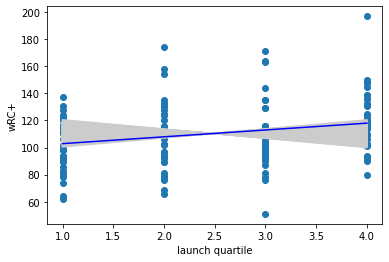

Percent of permutated regression slopes steeper than the real regression slope:  0.44999999999999996 %


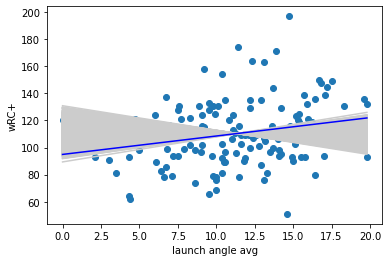

Percent of permutated regression slopes steeper than the real regression slope:  0.38999999999999996 %


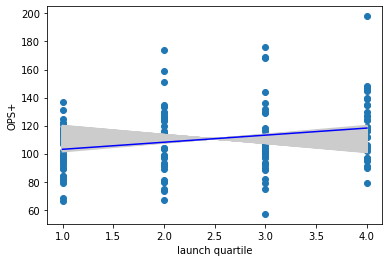

Percent of permutated regression slopes steeper than the real regression slope:  0.33999999999999997 %


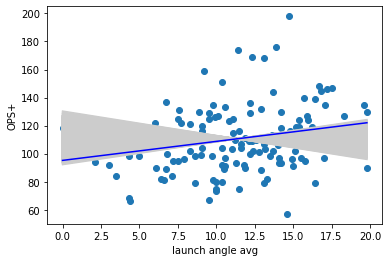

Percent of permutated regression slopes steeper than the real regression slope:  0.13999999999999999 %


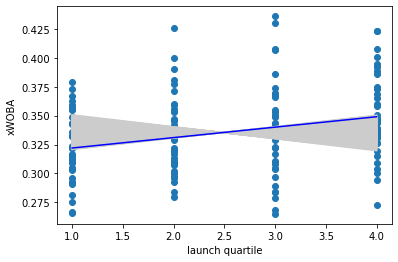

Percent of permutated regression slopes steeper than the real regression slope:  0.48 %


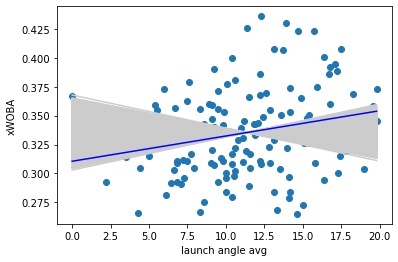

2016
Percent of permutated regression slopes steeper than the real regression slope:  0.47000000000000003 %


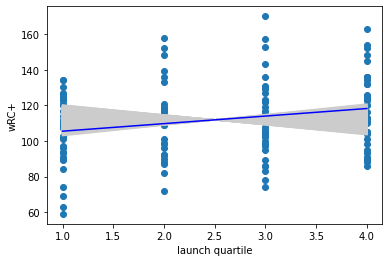

Percent of permutated regression slopes steeper than the real regression slope:  1.91 %


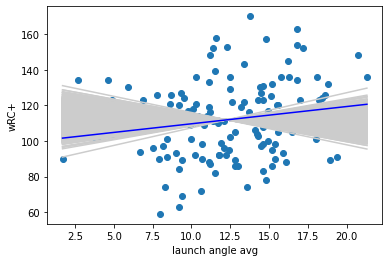

Percent of permutated regression slopes steeper than the real regression slope:  0.3 %


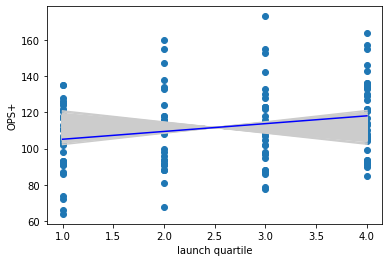

Percent of permutated regression slopes steeper than the real regression slope:  1.6500000000000001 %


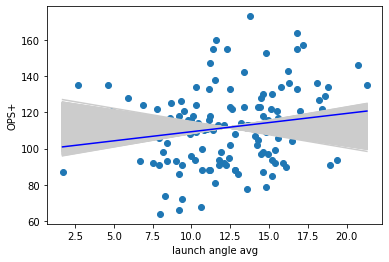

Percent of permutated regression slopes steeper than the real regression slope:  0.9199999999999999 %


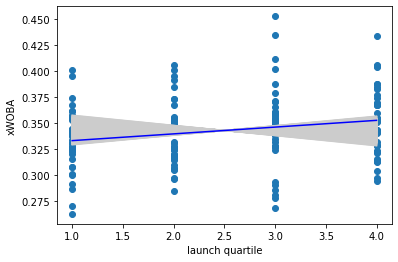

Percent of permutated regression slopes steeper than the real regression slope:  5.75 %


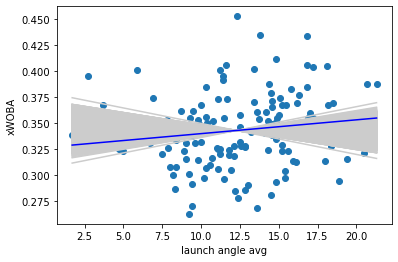

2017
Percent of permutated regression slopes steeper than the real regression slope:  1.48 %


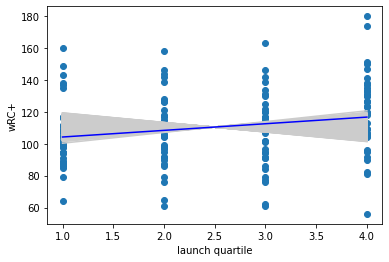

Percent of permutated regression slopes steeper than the real regression slope:  2.3 %


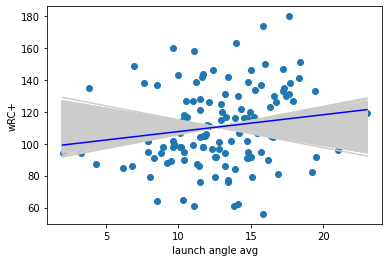

Percent of permutated regression slopes steeper than the real regression slope:  1.32 %


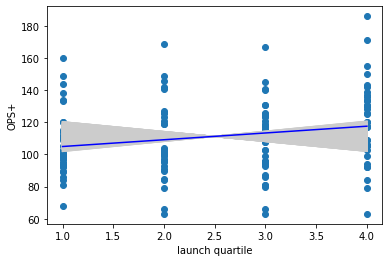

Percent of permutated regression slopes steeper than the real regression slope:  1.94 %


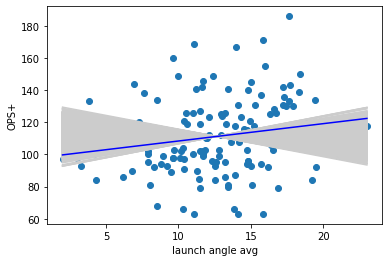

Percent of permutated regression slopes steeper than the real regression slope:  2.91 %


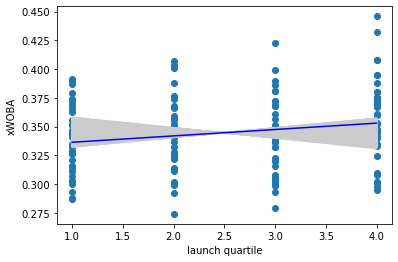

Percent of permutated regression slopes steeper than the real regression slope:  1.7999999999999998 %


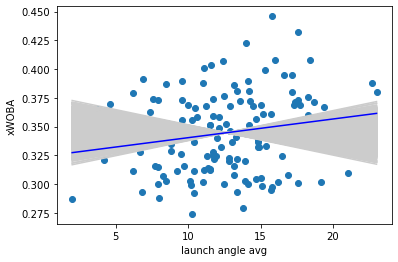

2018
Percent of permutated regression slopes steeper than the real regression slope:  2.78 %


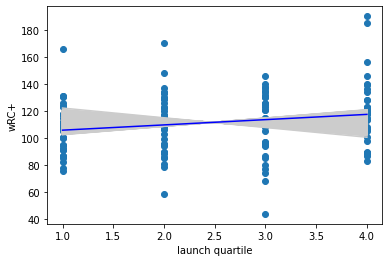

Percent of permutated regression slopes steeper than the real regression slope:  1.31 %


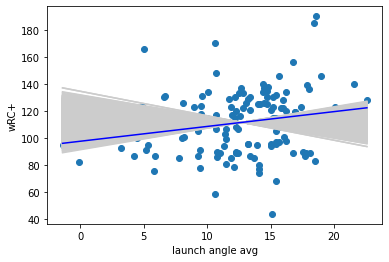

Percent of permutated regression slopes steeper than the real regression slope:  1.1900000000000002 %


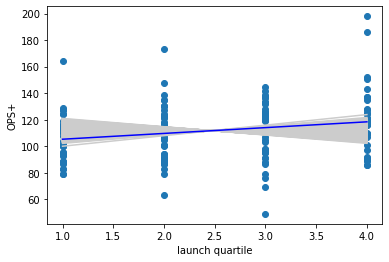

Percent of permutated regression slopes steeper than the real regression slope:  0.51 %


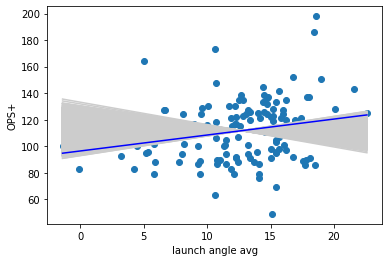

Percent of permutated regression slopes steeper than the real regression slope:  4.15 %


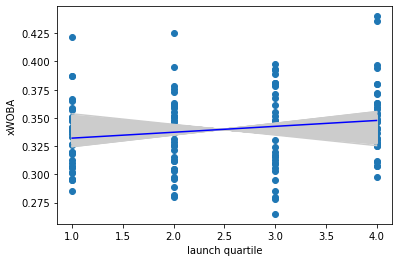

Percent of permutated regression slopes steeper than the real regression slope:  1.78 %


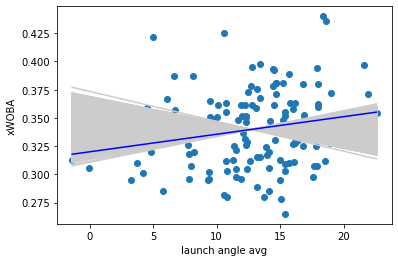

2019
Percent of permutated regression slopes steeper than the real regression slope:  0.51 %


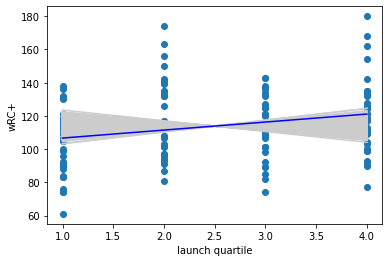

Percent of permutated regression slopes steeper than the real regression slope:  0.09 %


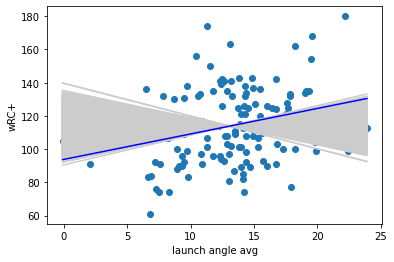

Percent of permutated regression slopes steeper than the real regression slope:  0.31 %


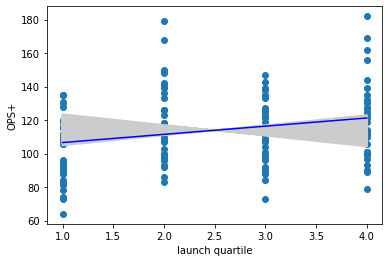

Percent of permutated regression slopes steeper than the real regression slope:  0.08 %


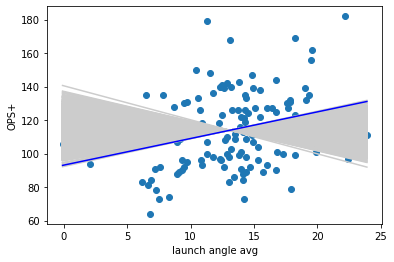

Percent of permutated regression slopes steeper than the real regression slope:  0.21 %


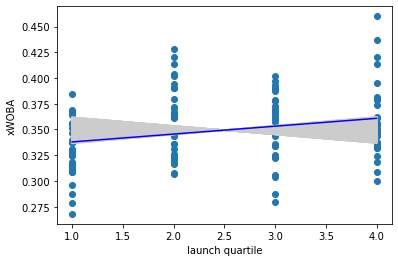

Percent of permutated regression slopes steeper than the real regression slope:  0.0 %


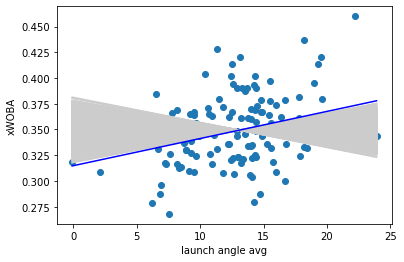

All Years Combined
Percent of permutated regression slopes steeper than the real regression slope:  0.0 %


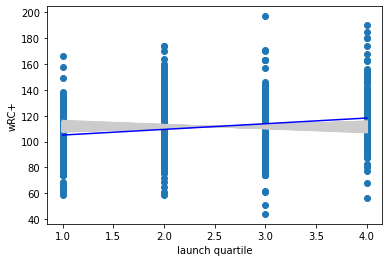

Percent of permutated regression slopes steeper than the real regression slope:  0.0 %


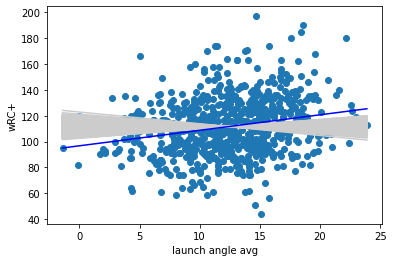

Percent of permutated regression slopes steeper than the real regression slope:  0.0 %


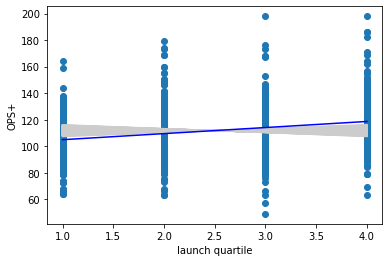

Percent of permutated regression slopes steeper than the real regression slope:  0.0 %


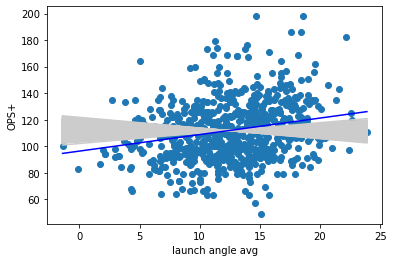

Percent of permutated regression slopes steeper than the real regression slope:  0.0 %


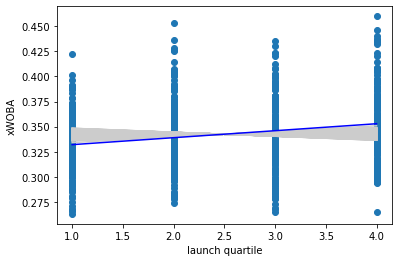

Percent of permutated regression slopes steeper than the real regression slope:  0.0 %


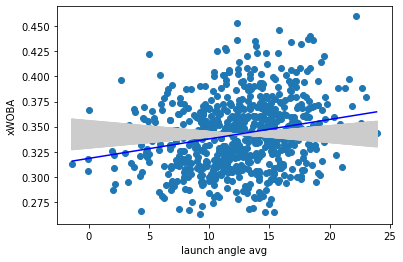

In [48]:
for i in range(5):
    print(i + 2015)
    plot_fake_vs_real_and_significance(dataframes[i][x_rows[0]], dataframes[i][y_columns[0]], dataframes[i][[x_rows[0]]], wRC_models[i], 'launch quartile', 'wRC+', np.array([1, 4]))
    plot_fake_vs_real_and_significance(dataframes[i][x_rows[1]], dataframes[i][y_columns[0]], dataframes[i][[x_rows[1]]], wRC_models_2[i], 'launch angle avg', 'wRC+', np.array([dataframes[i][x_rows[1]].min(), dataframes[i][x_rows[1]].max()]))
    
    plot_fake_vs_real_and_significance(dataframes[i][x_rows[0]], dataframes[i][y_columns[1]], dataframes[i][[x_rows[0]]], OPS_models[i], 'launch quartile', 'OPS+', np.array([1, 4]))
    plot_fake_vs_real_and_significance(dataframes[i][x_rows[1]], dataframes[i][y_columns[1]], dataframes[i][[x_rows[1]]], OPS_models_2[i], 'launch angle avg', 'OPS+', np.array([dataframes[i][x_rows[1]].min(), dataframes[i][x_rows[1]].max()]))
    
    plot_fake_vs_real_and_significance(dataframes[i][x_rows[0]], dataframes[i][y_columns[2]], dataframes[i][[x_rows[0]]], xWOBA_models[i], 'launch quartile', 'xWOBA', np.array([1, 4]))
    plot_fake_vs_real_and_significance(dataframes[i][x_rows[1]], dataframes[i][y_columns[2]], dataframes[i][[x_rows[1]]], xWOBA_models_2[i], 'launch angle avg', 'xWOBA', np.array([dataframes[i][x_rows[1]].min(), dataframes[i][x_rows[1]].max()]))

print('All Years Combined')
plot_fake_vs_real_and_significance(dataframes[5][x_rows[0]], dataframes[5][y_columns[0]], dataframes[5][[x_rows[0]]], wRC_models[5], 'launch quartile', 'wRC+', np.array([1, 4]))
plot_fake_vs_real_and_significance(dataframes[5][x_rows[1]], dataframes[5][y_columns[0]], dataframes[5][[x_rows[1]]], wRC_models_2[5], 'launch angle avg', 'wRC+', np.array([dataframes[5][x_rows[1]].min(), dataframes[5][x_rows[1]].max()]))
    
plot_fake_vs_real_and_significance(dataframes[5][x_rows[0]], dataframes[5][y_columns[1]], dataframes[5][[x_rows[0]]], OPS_models[5], 'launch quartile', 'OPS+', np.array([1, 4]))
plot_fake_vs_real_and_significance(dataframes[5][x_rows[1]], dataframes[5][y_columns[1]], dataframes[5][[x_rows[1]]], OPS_models_2[5], 'launch angle avg', 'OPS+', np.array([dataframes[5][x_rows[1]].min(), dataframes[5][x_rows[1]].max()]))
    
plot_fake_vs_real_and_significance(dataframes[5][x_rows[0]], dataframes[5][y_columns[2]], dataframes[5][[x_rows[0]]], xWOBA_models[5], 'launch quartile', 'xWOBA', np.array([1, 4]))
plot_fake_vs_real_and_significance(dataframes[5][x_rows[1]], dataframes[5][y_columns[2]], dataframes[5][[x_rows[1]]], xWOBA_models_2[5], 'launch angle avg', 'xWOBA', np.array([dataframes[5][x_rows[1]].min(), dataframes[5][x_rows[1]].max()]))

In each scatterplot above, the blue line represents our real regression slope, where the gray area is made of 1000 randomly generated slopes. It can be determined just by looking that the slopes of the blue line tend to be near the steepest of the gray, randomly generated lines. In this case, our eye test is confirmed by the numbers, as the percentage next to each scatterplot tells how many random slopes were steeper than our real slope.  
If we set our threshold for significance at 5% (random slopes steeper than real slopes), then only 2018 xWOBA vs launch angle avg misses the mark and is insignificant. Because 5% is arbitrary, we can decrease that threshold to 3%, and in that case only the two xWOBA regressions from 2018 are insignificant. 22 of the 36 plots have a percent of permuted regression slopes steeper than the real regression slope under 1%, and when looking at data for all years, all of the percentages calculated were 0%: the regression slope generated from the real data was steeper than every one of the 1,000 regression slopes generated from permuting the y-values. And in some cases, like wRC+ vs launch angle average, OPS+ vs launch angle average, and xWOBA versus launch angle average, there is a lot of daylight between our real slope and the steepest random slope.

# Conclusions  
From these analyses, we can conclude that there is a positive correlation between launch angle and offensive performance. However, the regression scores being relatively low casted some doubt as to whether or not our results were significant.  
After testing the significance of our resulting slopes, I would conclude that our results were significant, as with a 5% significance threshold only 1 of the 36 tests that we performed did not show significant results, and not by much. As said before, if we decrease our threshold to 3%, only 2 of the 36 become insignificant, both xWOBA regressions from 2018. If we lower the threshold to 1%, 22 of the 36 are still significant.  
Despite our low R-Squared scores, our slopes were significant to the point that I believe there is a relationship between our offensive predictors and both launch angle average and launch quartile. Noise is to be expected in this kind of dataset, professional athletes are all elite in one way or another, and it would be unreasonable to say that only one value could prescribe success.  
One weakness of this analysis is that we used average launch angle as our predictor. Average launch angle is not a strong statistic because of the different kinds of ways an average can be composed: a player could hit only fly balls and only ground balls, and a player could hit only line drives, and both could end up with the same average launch angle despite compeltely different profiles.  
A better way to determine if trying to hit the ball with a certain launch angle might be to determine how succesful the shift in philosophy, from flat or downwards swings to uppercut swings, has been. We could do this by looking at flyball%, the percent of time that a player hits the ball with a launch angle between 25 and 50 degrees, and associating this with offensive stats, or even with a statistic like xISO, which measures a player's ability to hit for power while disregarding their general hitting ability.  
Despite its weaknesses, this analysis could be useful when determining a general strategy for evaluating hitters. Given a dead tie between two prospects, you might choose the one with more room for improvement by selecting the one with the lower launch angle, in an attempt to alter their swing to better their offensive performance.

# End of preregistered analysis

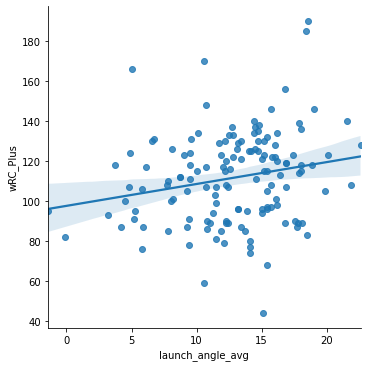

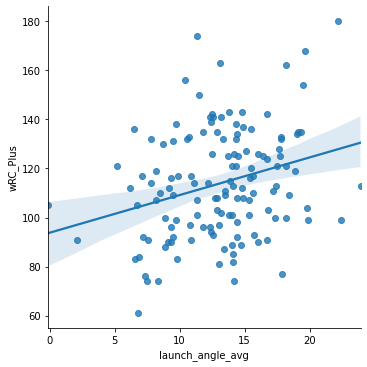

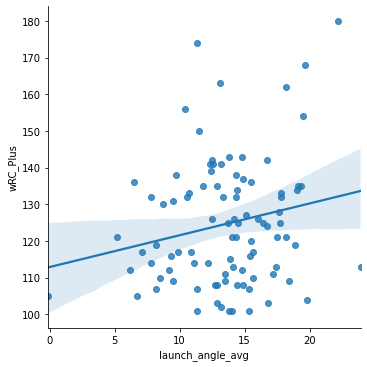

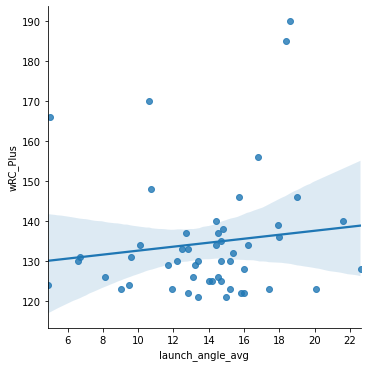

<ipython-input-50-e0f5d95b1482>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2019[data_2017['wRC_Plus'] > 120])


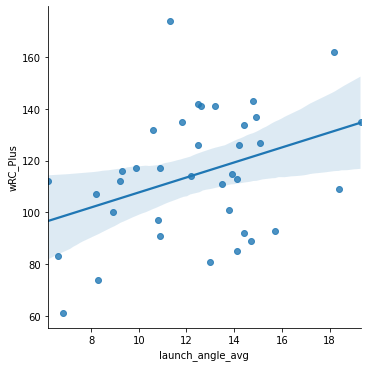

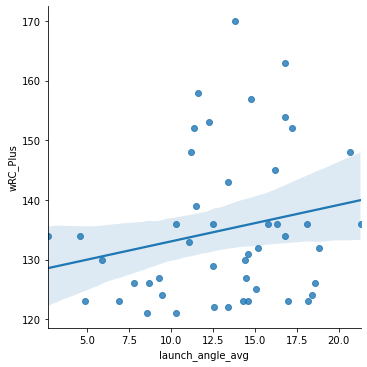

In [50]:
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2018)
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2019)
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2019[data_2019['wRC_Plus'] > 100])
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2018[data_2018['wRC_Plus'] > 120])
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2019[data_2017['wRC_Plus'] > 120])
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2016[data_2016['wRC_Plus'] > 120])
plt.show()

In [51]:
def launch_angle_avg_octile(n):
    if(n >= q0 and n <= q05):
        return 1
    if(n >= q05 and n <=q1):
        return 2
    if(n >= q1 and n <= q15):
        return 3
    if(n >= q15 and n <= q2):
        return 4
    if(n >= q2 and n <= q25):
        return 5
    if(n >= q25 and n <=q3):
        return 6
    if(n >= q3 and n <= q35):
        return 7
    if(n >= q35 and n <= q4):
        return 8

q0 = data_2016['launch_angle_avg'].quantile(0)
q05 = data_2016['launch_angle_avg'].quantile(0.125)
q1 = data_2016['launch_angle_avg'].quantile(0.25)
q15 = data_2016['launch_angle_avg'].quantile(0.375)
q2 = data_2016['launch_angle_avg'].quantile(0.5)
q25 = data_2016['launch_angle_avg'].quantile(0.625)
q3 = data_2016['launch_angle_avg'].quantile(0.75)
q35 = data_2016['launch_angle_avg'].quantile(0.875)
q4 = data_2016['launch_angle_avg'].quantile(1)

dummy_2016_octile = map(launch_angle_avg_octile, data_2016['launch_angle_avg'])
data_2016['launch_octile'] = list(dummy_2016_octile)

#wRC_model_2016_oct = LinearRegression().fit(data_2016[['launch_octile']], data_2016[['wRC_Plus']])
#print('Predictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model.coef_[0][0], wRC_model.score(data_2016[['launch_octile']], data_2016[['wRC_Plus']])))

#sns.regplot(x="launch_octile", y="wRC_Plus", data=data_2016);

#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 1]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 2]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 3]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 4]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 5]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 6]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 7]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 8]);

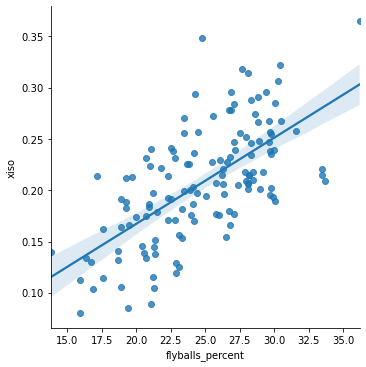

Predictor: flyball percent
Regression Slope: 0.008396772644929936
R-squared: 0.4238839813765234



In [52]:
sns.lmplot(x="flyballs_percent", y="xiso", data=data_2019)
plt.show()

flyballs_model_2019 = LinearRegression().fit(data_2019[['flyballs_percent']], data_2019[['xiso']])
print('Predictor: flyball percent\nRegression Slope: {}\nR-squared: {}\n'.format(flyballs_model_2019.coef_[0][0], flyballs_model_2019.score(data_2019[['flyballs_percent']], data_2019[['xiso']])))

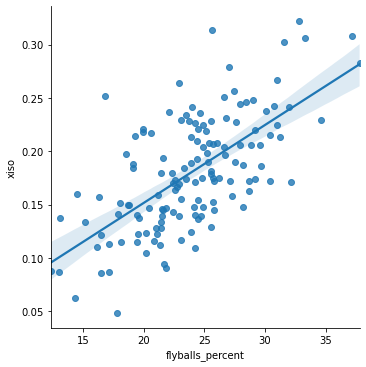

Predictor: flyball percent
Regression Slope: 0.007302346855667315
R-squared: 0.425183460899075



In [53]:
sns.lmplot(x="flyballs_percent", y="xiso", data=data_2018)
plt.show()

flyballs_model_2018 = LinearRegression().fit(data_2018[['flyballs_percent']], data_2018[['xiso']])
print('Predictor: flyball percent\nRegression Slope: {}\nR-squared: {}\n'.format(flyballs_model_2018.coef_[0][0], flyballs_model_2018.score(data_2018[['flyballs_percent']], data_2018[['xiso']])))

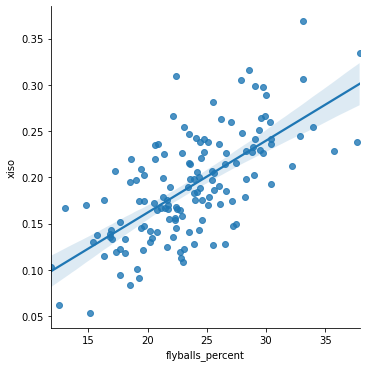

Predictor: flyball percent
Regression Slope: 0.007776722815256618
R-squared: 0.4534453583323734



In [54]:
sns.lmplot(x="flyballs_percent", y="xiso", data=data_2017)
plt.show()

flyballs_model_2017 = LinearRegression().fit(data_2017[['flyballs_percent']], data_2017[['xiso']])
print('Predictor: flyball percent\nRegression Slope: {}\nR-squared: {}\n'.format(flyballs_model_2017.coef_[0][0], flyballs_model_2017.score(data_2017[['flyballs_percent']], data_2017[['xiso']])))

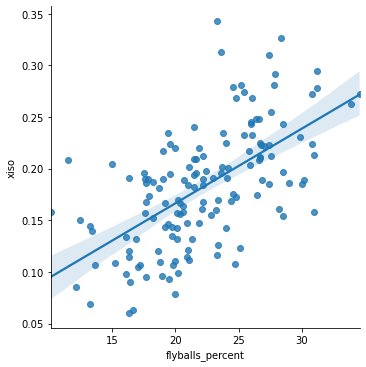

Predictor: flyball percent
Regression Slope: 0.007212659476237146
R-squared: 0.3664535143326877



In [55]:
sns.lmplot(x="flyballs_percent", y="xiso", data=data_2016)
plt.show()

flyballs_model_2016 = LinearRegression().fit(data_2016[['flyballs_percent']], data_2016[['xiso']])
print('Predictor: flyball percent\nRegression Slope: {}\nR-squared: {}\n'.format(flyballs_model_2016.coef_[0][0], flyballs_model_2016.score(data_2016[['flyballs_percent']], data_2016[['xiso']])))

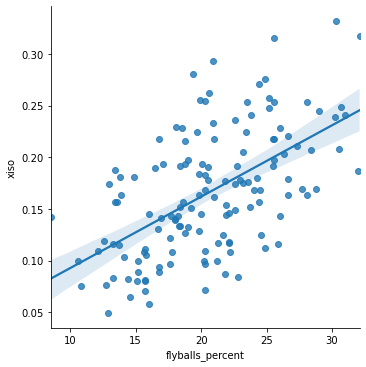

Predictor: flyball percent
Regression Slope: 0.006915478744005283
R-squared: 0.32682584226020217



In [56]:
sns.lmplot(x="flyballs_percent", y="xiso", data=data_2015)
plt.show()

flyballs_model_2015 = LinearRegression().fit(data_2015[['flyballs_percent']], data_2015[['xiso']])
print('Predictor: flyball percent\nRegression Slope: {}\nR-squared: {}\n'.format(flyballs_model_2015.coef_[0][0], flyballs_model_2015.score(data_2015[['flyballs_percent']], data_2015[['xiso']])))

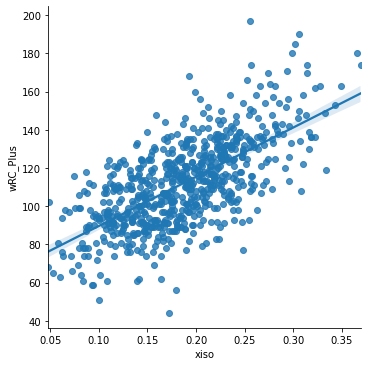

wRC+ model
Predictor: xiso
Regression Slope: 257.9467533373635
R-squared: 0.46587118593961185



In [57]:
sns.lmplot(x="xiso", y="wRC_Plus", data=all_data)
plt.show()

xiso_all = LinearRegression().fit(all_data[['xiso']], all_data[['wRC_Plus']])
print('wRC+ model\nPredictor: xiso\nRegression Slope: {}\nR-squared: {}\n'.format(xiso_all.coef_[0][0], xiso_all.score(data_2015[['xiso']], data_2015[['wRC_Plus']])))

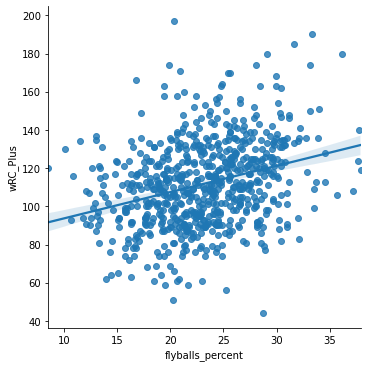

wRC+ model
Predictor: flyball percent
Regression Slope: 1.3757463729312396
R-squared: 0.0921091020365915



In [58]:
sns.lmplot(x="flyballs_percent", y="wRC_Plus", data=all_data)
plt.show()

flyballs_model_all = LinearRegression().fit(all_data[['flyballs_percent']], all_data[['wRC_Plus']])
print('wRC+ model\nPredictor: flyball percent\nRegression Slope: {}\nR-squared: {}\n'.format(flyballs_model_all.coef_[0][0], flyballs_model_all.score(all_data[['flyballs_percent']], all_data[['wRC_Plus']])))

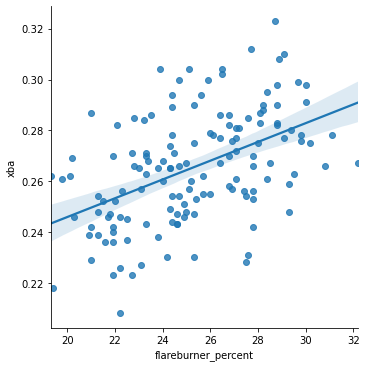

Predictor: flareburner%
Regression Slope: 0.0036932246108991253
R-squared: -1.5991471078773865



In [59]:
sns.lmplot(x="flareburner_percent", y="xba", data=data_2015)
plt.show()

flareburner_model_2015 = LinearRegression().fit(data_2015[['flareburner_percent']], data_2015[['xba']])
print('Predictor: flareburner%\nRegression Slope: {}\nR-squared: {}\n'.format(flareburner_model_2015.coef_[0][0], flareburner_model_2015.score(data_2015[['flyballs_percent']], data_2015[['xiso']])))